# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range? 
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
7. Which giftors provide the most money, in total?

In [46]:
import pandas as pd
df = pd.read_csv("./data/ForeignGifts_edu.csv")

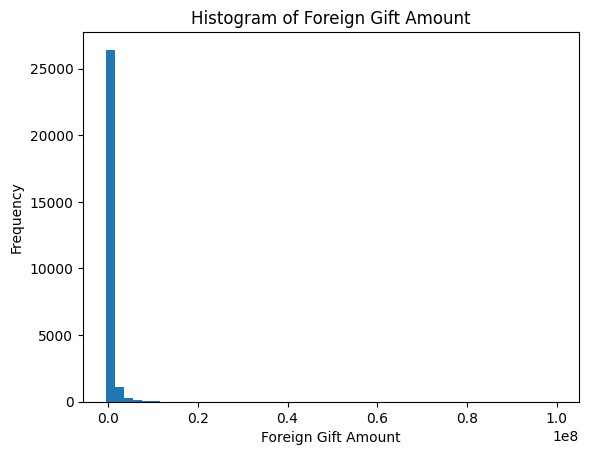

In [47]:
import matplotlib.pyplot as plt
plt.hist(df["Foreign Gift Amount"], bins=50)
plt.xlabel("Foreign Gift Amount")
plt.ylabel("Frequency")
plt.title("Histogram of Foreign Gift Amount")
plt.show()

The histogram shows that most gift amounts are small but frequent. Its highly skewed towards the left, so the mean will actually be lower than the median.

In [48]:
gift_counts = df["Gift Type"].value_counts()
print(gift_counts)
print(gift_counts / gift_counts.sum())


Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: count, dtype: int64
Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: count, dtype: float64


About 61.21% of gifts are contracts, 38.75% are Monetary, and 0.04% is Real Estate.

C:\Users\bridget\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\bridget\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


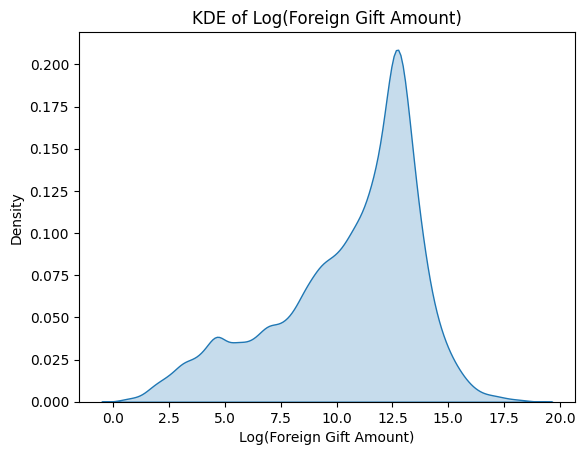

In [49]:
import numpy as np
import seaborn as sns

df['log_Foreign Gift Amount'] = np.log(df['Foreign Gift Amount'] + 1)  
sns.kdeplot(df['log_Foreign Gift Amount'], fill=True)
plt.xlabel('Log(Foreign Gift Amount)')
plt.title('KDE of Log(Foreign Gift Amount)')
plt.show()


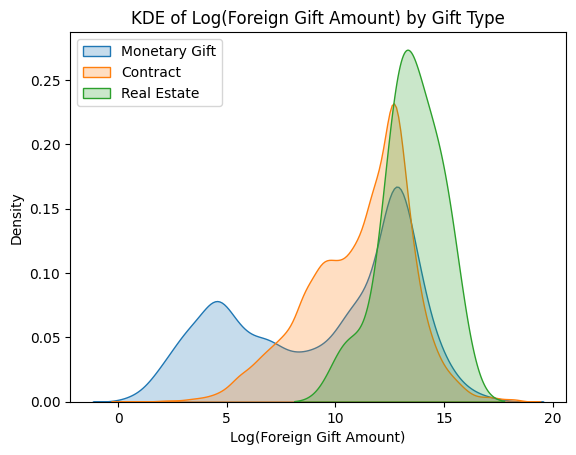

In [50]:
for gift_type in df['Gift Type'].unique():
    subset = df[df['Gift Type'] == gift_type]
    sns.kdeplot(subset['log_Foreign Gift Amount'], fill=True, label=gift_type)
plt.xlabel('Log(Foreign Gift Amount)')
plt.title('KDE of Log(Foreign Gift Amount) by Gift Type')
plt.legend()
plt.show()

The overall log transformed data appears to be skewed slightly but mostly bell shaped, peaking at about 12.5. But when split by gift type, Monetary gifts have a broader spread, contracts is similar to the overall log, and real estate has a narrow spread skewed right.

In [51]:
country_counts = df.groupby('Country of Giftor')['Foreign Gift Amount'].count().sort_values(ascending=False)
top15_countries_count = country_counts.head(15)
print(top15_countries_count)

Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: Foreign Gift Amount, dtype: int64


In [52]:
country_sums = df.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False)
top15_countries_amount = country_sums.head(15)
print(top15_countries_amount)


Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64


England gives the most amount of gifts, but Qatar gives the most in terms of value. This is interesting because England gave 3655 while Qatar gave 693, which means that Qatar gave considerably more per gift.

In [53]:
institution_sums = df.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False)
top15_institutions = institution_sums.head(15)
print(top15_institutions)


Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64


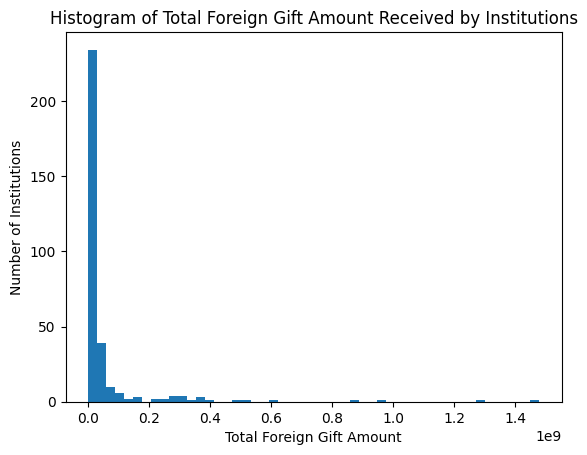

In [54]:
plt.hist(institution_sums, bins=50)
plt.xlabel('Total Foreign Gift Amount')
plt.ylabel('Number of Institutions')
plt.title('Histogram of Total Foreign Gift Amount Received by Institutions')
plt.show()


A small amount of institutions reveive an extremely large sum of foreign gifts, while most receive few or zero. This is a strong right skew.

In [55]:
giftor_sums = df.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False)
top_giftors = giftor_sums.head(15)
print(top_giftors)

Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [56]:
import pandas as pd
airbnb = pd.read_csv('./data/airbnb_hw.csv')

In [57]:
print(airbnb.shape)   
print(airbnb.columns)     
airbnb.head()

(30478, 13)
Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [58]:
ctab = pd.crosstab(airbnb["Room Type"], airbnb["Property Type"])
print(ctab)

Property Type    Apartment  Bed & Breakfast  Boat  Bungalow  Cabin  Camper/RV  \
Room Type                                                                       
Entire home/apt      15669               13     7         4      1          6   
Private room         10748              155     1         0      1          1   
Shared room            685               12     0         0      0          0   

Property Type    Castle  Chalet  Condominium  Dorm  House  Hut  Lighthouse  \
Room Type                                                                    
Entire home/apt       0       0           72     4    752    0           1   
Private room          1       1           22    16   1258    2           0   
Shared room           0       0            0    11     80    0           0   

Property Type    Loft  Other  Tent  Townhouse  Treehouse  Villa  
Room Type                                                        
Entire home/apt   392     14     0         83          0      4  
Priva

The apartment entire home is the most popular type of property for airbnb. While tnet, tree house, villa, hut, lighthouse, camper, cabin, and bungalow are uncommon. The most popular is entire home/private room.

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\bridget\AppData\Local\Temp\ipykernel_17196\2500779611.py:3: SyntaxWarning: invalid escape sequence '\$'
  airbnb["Price"] = airbnb["Price"].replace('[\$,]', '', regex=True).astype(float)


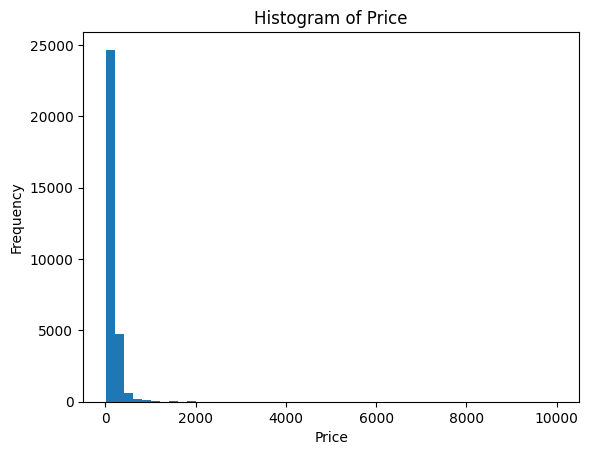

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
airbnb["Price"] = airbnb["Price"].replace('[\$,]', '', regex=True).astype(float)

plt.hist(airbnb["Price"], bins=50)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of Price")
plt.show()


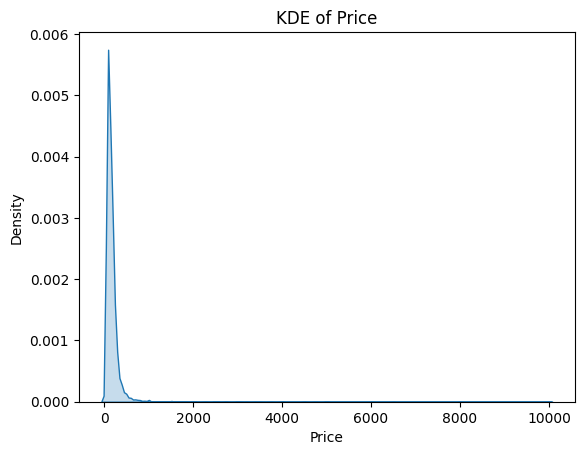

In [60]:
sns.kdeplot(airbnb["Price"], fill=True)
plt.xlabel("Price")
plt.title("KDE of Price")
plt.show()

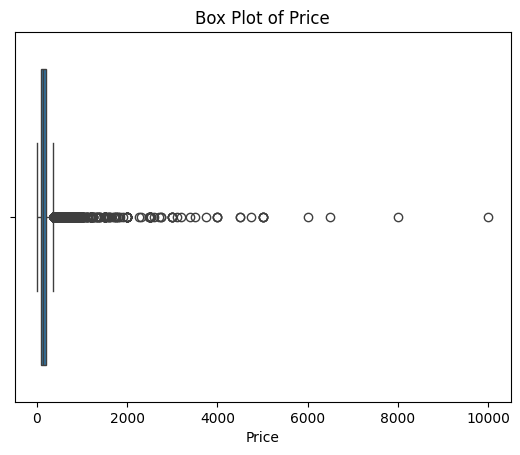

In [61]:
sns.boxplot(x=airbnb["Price"])
plt.title("Box Plot of Price")
plt.show()

In [62]:
print(airbnb["Price"].describe())

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64


In [63]:
import numpy as np

airbnb["price_log"] = np.log(airbnb["Price"] + 1)  # +1 to avoid log(0)


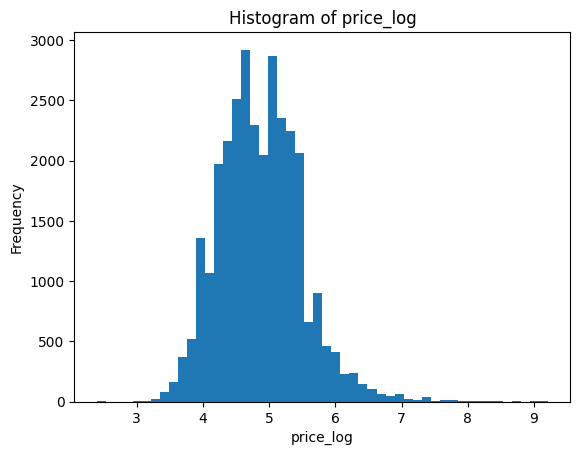

In [64]:
plt.hist(airbnb["price_log"], bins=50)
plt.xlabel("price_log")
plt.ylabel("Frequency")
plt.title("Histogram of price_log")
plt.show()

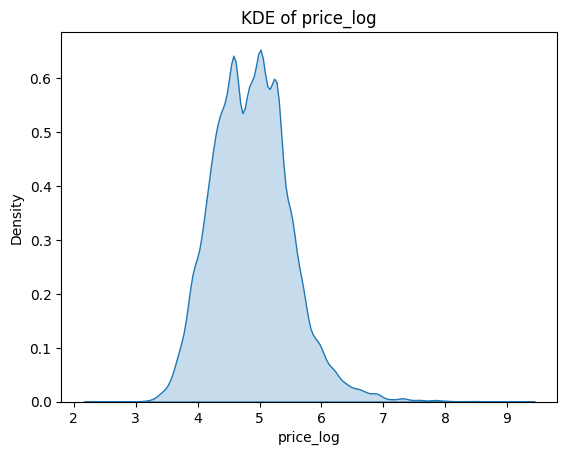

In [65]:
sns.kdeplot(airbnb["price_log"], fill=True)
plt.xlabel("price_log")
plt.title("KDE of price_log")
plt.show()

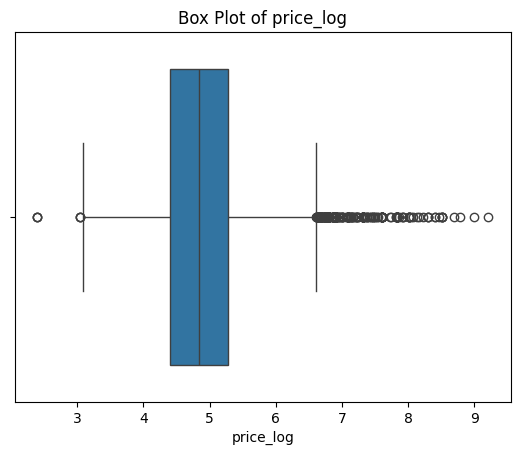

In [66]:
sns.boxplot(x=airbnb["price_log"])
plt.title("Box Plot of price_log")
plt.show()

In [67]:
print(airbnb["price_log"].describe())

count    30478.000000
mean         4.869699
std          0.622704
min          2.397895
25%          4.394449
50%          4.836282
75%          5.278115
max          9.210440
Name: price_log, dtype: float64


The data for the original plots are badly scaled with lots of outliers, but doing the log of price scaled the plots so that they are easier to read.

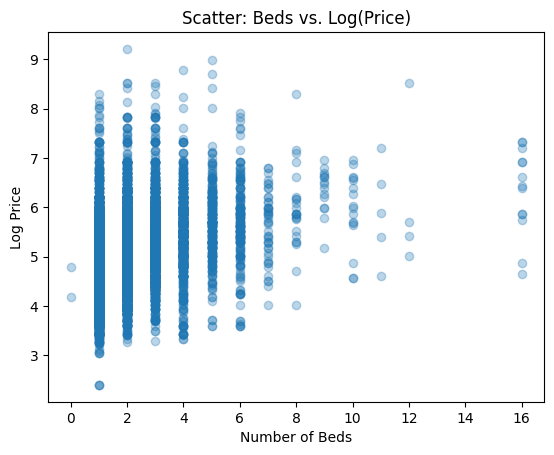

In [68]:
plt.scatter(airbnb["Beds"], airbnb["price_log"], alpha=0.3)
plt.xlabel("Number of Beds")
plt.ylabel("Log Price")
plt.title("Scatter: Beds vs. Log(Price)")
plt.show()

In [69]:
grouped_beds = airbnb.groupby("Beds")["Price"].describe()
print(grouped_beds)

        count         mean          std    min     25%    50%      75%  \
Beds                                                                     
0.0       2.0    92.000000    38.183766   65.0   78.50   92.0   105.50   
1.0   20344.0   127.673810   107.047827   10.0   75.00  100.0   155.00   
2.0    6610.0   199.061271   225.706318   25.0  115.00  160.0   225.00   
3.0    2071.0   268.118300   303.106942   26.0  140.00  200.0   300.00   
4.0     783.0   315.332056   353.184402   27.0  150.00  247.0   375.00   
5.0     284.0   411.500000   672.610659   35.0  189.75  290.0   450.00   
6.0     177.0   401.768362   417.018431   35.0  199.00  275.0   425.00   
7.0      45.0   341.377778   220.116631   55.0  177.00  300.0   445.00   
8.0      24.0   589.041667   793.054934   55.0  243.75  350.0   481.25   
9.0      15.0   618.000000   233.649616  175.0  447.50  650.0   762.50   
10.0     16.0   480.187500   296.820534   95.0  291.00  407.5   706.25   
11.0      5.0   535.800000   499.21758

In [71]:
stats_by_type = airbnb.groupby(["Room Type","Property Type"])["Price"].describe()
print(stats_by_type)

                                   count        mean          std    min  \
Room Type       Property Type                                              
Entire home/apt Apartment        15669.0  213.224839   218.097834   10.0   
                Bed & Breakfast     13.0  184.538462   119.814172   85.0   
                Boat                 7.0  158.428571    51.110524  100.0   
                Bungalow             4.0  150.750000    46.464144   87.0   
                Cabin                1.0  250.000000          NaN  250.0   
                Camper/RV            6.0  114.333333   107.685963   45.0   
                Condominium         72.0  304.861111   266.197497   80.0   
                Dorm                 4.0   44.250000    24.060687   30.0   
                House              752.0  297.263298   468.409428   27.0   
                Lighthouse           1.0   39.000000          NaN   39.0   
                Loft               392.0  330.510204   321.519721   55.0   
            

The median would be better than the mean because of the outliers in the price and number of beds.

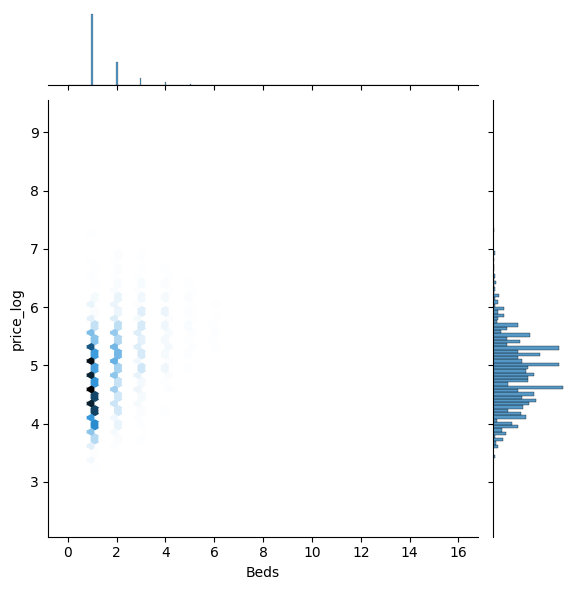

In [72]:
sns.jointplot(
    x="Beds",
    y="price_log",
    data=airbnb,
    kind="hex"
)
plt.show()


The data points are clustered towards 1-3 beds, but after trandormation the data is right skewed, meaning there are a few expensive properties. The histogram shows that there are very few listings with 10+ beds. There does seem to be a slight trend where more beds means more expensive. This could indicate that more rooms means more expensive homes.

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [75]:
import pandas as pd

file_path = "./data/drilling_rigs.csv"
df = pd.read_csv(file_path)

print(df.info()) 
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column                                                                                       Non-Null Count  Dtype 
---  ------                                                                                       --------------  ----- 
 0   Month                                                                                        623 non-null    object
 1   Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                 623 non-null    int64 
 2   Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                623 non-null    int64 
 3   Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)                                   623 non-null    object
 4   Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                                 623 non-null    object
 5   Crude Oil and Natural Gas Rotary Rigs in Op

,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs)
0,1973 January,1120,99,Not Available,Not Available,Not Available,Not Available,Not Available,1219,1549
1,1973 February,1037,89,Not Available,Not Available,Not Available,Not Available,Not Available,1126,1677
2,1973 March,959,90,Not Available,Not Available,Not Available,Not Available,Not Available,1049,1805
3,1973 April,914,79,Not Available,Not Available,Not Available,Not Available,Not Available,993,1898
4,1973 May,974,72,Not Available,Not Available,Not Available,Not Available,Not Available,1046,1991


column 3,4,5,6,7, and 9 is an object instead of numeric, the month is also a year and a month, which should either be a date column or separated into a month and year column.

In [77]:
df['time'] = pd.to_datetime(df['Month'], format='mixed')
print(df['time'])

0     1973-01-01
1     1973-02-01
2     1973-03-01
3     1973-04-01
4     1973-05-01
         ...    
618   2024-07-01
619   2024-08-01
620   2024-09-01
621   2024-10-01
622   2024-11-01
Name: time, Length: 623, dtype: datetime64[ns]


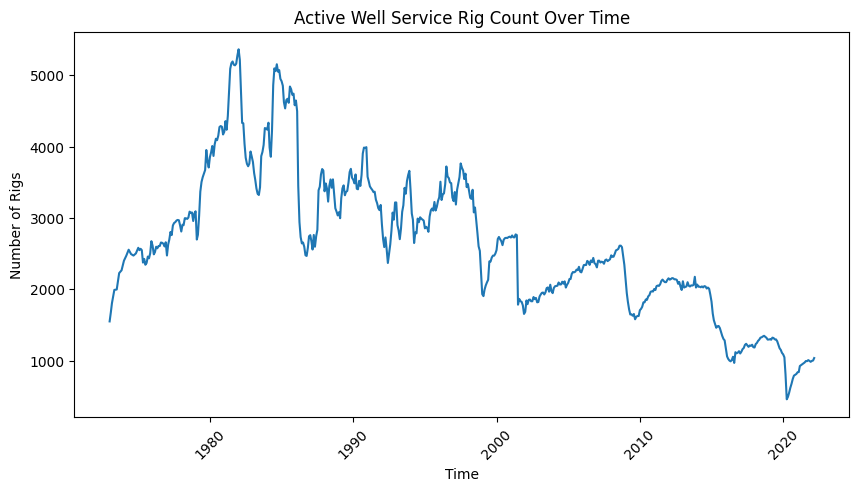

In [81]:
df['Active Well Service Rig Count (Number of Rigs)'] = pd.to_numeric(
    df['Active Well Service Rig Count (Number of Rigs)'], errors='coerce'
)

# Plot time series
plt.figure(figsize=(10, 5))
sns.lineplot(x=df['time'], y=df['Active Well Service Rig Count (Number of Rigs)'])
plt.xlabel("Time")
plt.ylabel("Number of Rigs")
plt.title("Active Well Service Rig Count Over Time")
plt.xticks(rotation=45)
plt.show()

The active well service was highest in the 1980s to 1990s, with small peaks throughtout the whole line. The line is trending downwards, with the lowest being 2020.

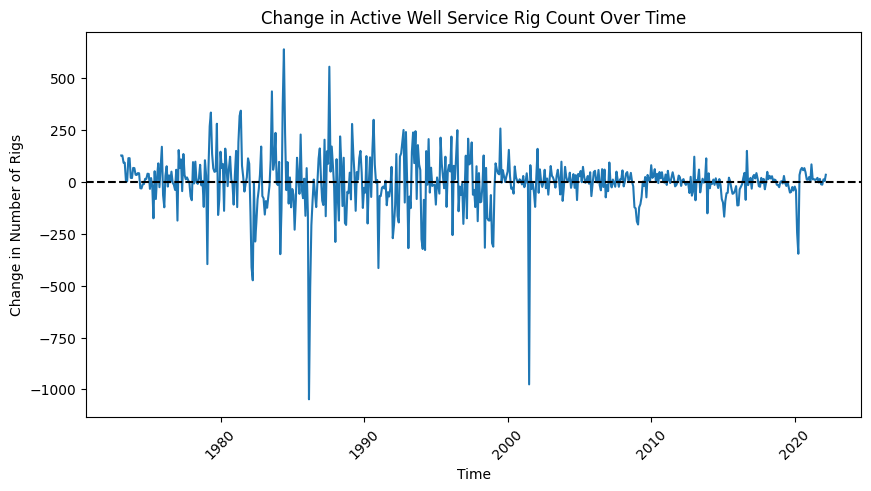

In [80]:
df['rig_change'] = df['Active Well Service Rig Count (Number of Rigs)'].diff()

# Plot first difference
plt.figure(figsize=(10, 5))
sns.lineplot(x=df['time'], y=df['rig_change'])
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Time")
plt.ylabel("Change in Number of Rigs")
plt.title("Change in Active Well Service Rig Count Over Time")
plt.xticks(rotation=45)
plt.show()


The changes correspond with the spikes. It seems like the numbers have become more stabnle over the years compared to 1980-1990, with a huge outlier in 2002 and a smaller outlier in 2000.

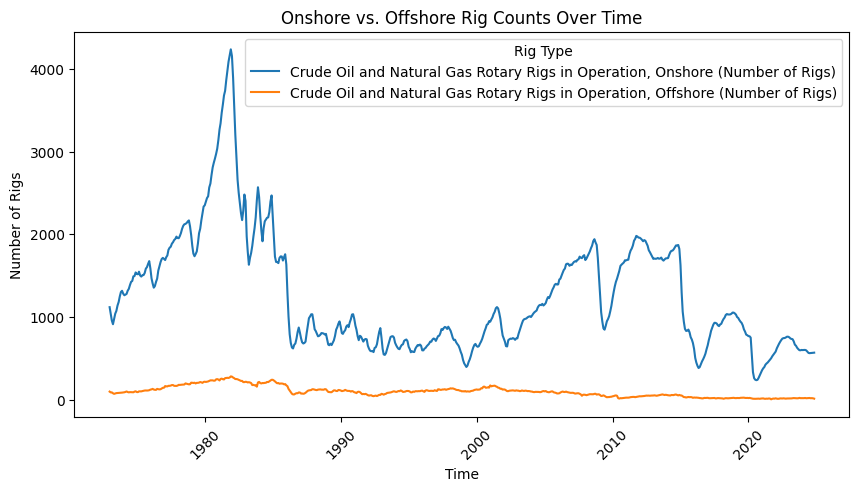

In [79]:
df_melted = df.melt(id_vars=['time'], value_vars=['Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'],
                    var_name="Rig Type", value_name="Count")


plt.figure(figsize=(10, 5))
sns.lineplot(x="time", y="Count", hue="Rig Type", data=df_melted)
plt.xlabel("Time")
plt.ylabel("Number of Rigs")
plt.title("Onshore vs. Offshore Rig Counts Over Time")
plt.xticks(rotation=45)
plt.legend(title="Rig Type")
plt.show()

off shore rigs have remained constant over time, but onshore has shown a lot of variation. there was a spike around 1983 and then it hovered around 1000 till the 2000's where it got higher again, reaching 2000 with a dip in 2008 and then continued to trend downwards with a dip in 2020. However no matter how much onshore dipped, it never reached offshore levels.